In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv("Barcelona_Fotocasa_HousingPrices.csv")
df = data.copy()

In [99]:
total_datos = df.shape
print(f"En esta base de datos hay un total de {total_datos[0]} valores y {total_datos[1]} columnas")

En esta base de datos hay un total de 8188 valores y 10 columnas


In [100]:
list(df.columns)

['Unnamed: 0',
 'price',
 'rooms',
 'bathroom',
 'lift',
 'terrace',
 'square_meters',
 'real_state',
 'neighborhood',
 'square_meters_price']

In [101]:
df.sample(5)

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
5308,5308,5500,3,2,True,False,100,NaN,Gràcia,55.000000
22,22,1800,3,2,False,False,102,flat,Eixample,17.647059
4729,4729,1000,2,1,False,False,70,flat,Ciutat Vella,14.285714
1497,1497,1540,4,1,False,False,73,apartment,Eixample,21.095890
5961,5961,1100,3,1,True,True,85,apartment,Ciutat Vella,12.941176


In [102]:
print(f"Hay {df.duplicated().sum()} filas duplicadas")

Hay 0 filas duplicadas


In [103]:
val_null= df.isnull().sum().sum()
print(f"Hay {val_null} valores nulos")

Hay 268 valores nulos


In [104]:
df_clean = df.dropna()

In [105]:
print(f"Hay {df_clean.isnull().sum()} valores nulos")

Hay Unnamed: 0             0
price                  0
rooms                  0
bathroom               0
lift                   0
terrace                0
square_meters          0
real_state             0
neighborhood           0
square_meters_price    0
dtype: int64 valores nulos


In [106]:
df_clean=df_clean.drop(columns="Unnamed: 0")

In [107]:
X = data.drop('price', axis=1)
y = data['price']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
numeric_features = ['rooms', 'bathroom', 'square_meters', 'square_meters_price']
categorical_features = ['lift', 'terrace', 'real_state', 'neighborhood']

In [110]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [111]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [113]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

In [114]:
# Evaluar cada modelo
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = pipeline.predict(X_test)
    
    # Calcular métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Imprimir resultados
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")

# Seleccionar el mejor modelo
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\nEl mejor modelo es: {best_model_name} con R2 = {results[best_model_name]['R2']:.2f}")

Linear Regression: MSE = 86061.53, R2 = 0.91
Ridge Regression: MSE = 86023.18, R2 = 0.91
Lasso Regression: MSE = 85680.73, R2 = 0.91
Decision Tree: MSE = 33813.79, R2 = 0.97
Random Forest: MSE = 39454.21, R2 = 0.96
Support Vector Regressor: MSE = 779763.21, R2 = 0.20

El mejor modelo es: Decision Tree con R2 = 0.97


In [115]:
# Definir el modelo de árbol de decisión
model = DecisionTreeRegressor()

# Crear un pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model)])

# Definir el grid de hiperparámetros para optimizar el árbol de decisión
param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
y_best_pred = grid_search.predict(X_test)

# Calcular métricas de rendimiento
best_mse = mean_squared_error(y_test, y_best_pred)
best_r2 = r2_score(y_test, y_best_pred)

print(f"Mejor modelo de Árbol de Decisión: MSE = {best_mse:.2f}, R2 = {best_r2:.2f}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Mejor modelo de Árbol de Decisión: MSE = 58111.17, R2 = 0.94
Mejores hiperparámetros: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}


Random Forest: MSE = 30115.23, R2 = 0.97


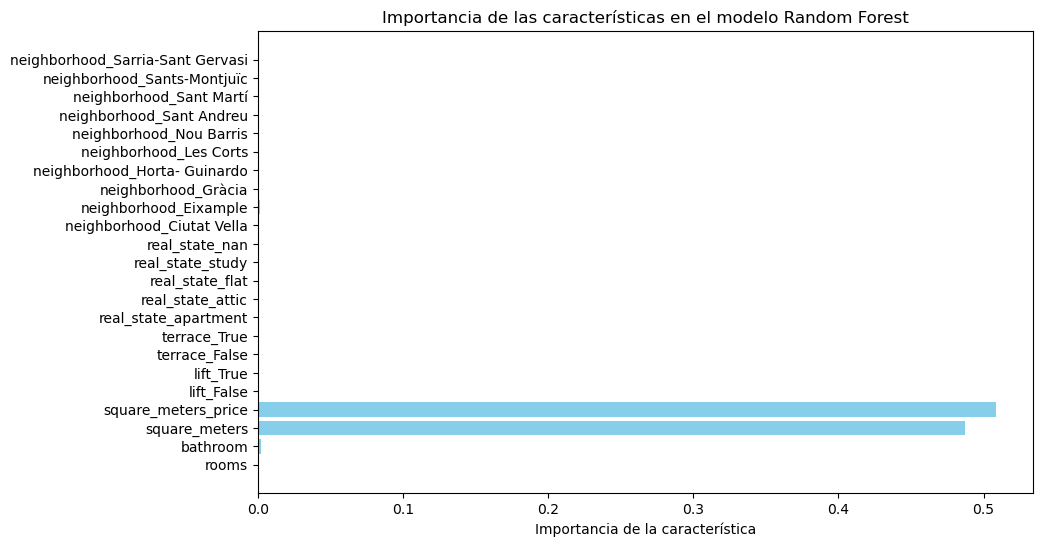

In [116]:
# Crear un pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model)])

# Entrenar el modelo Random Forest
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest: MSE = {mse:.2f}, R2 = {r2:.2f}")

# Obtener importancia de las características
feature_importances = pipeline.named_steps['model'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en el modelo Random Forest')
plt.show()

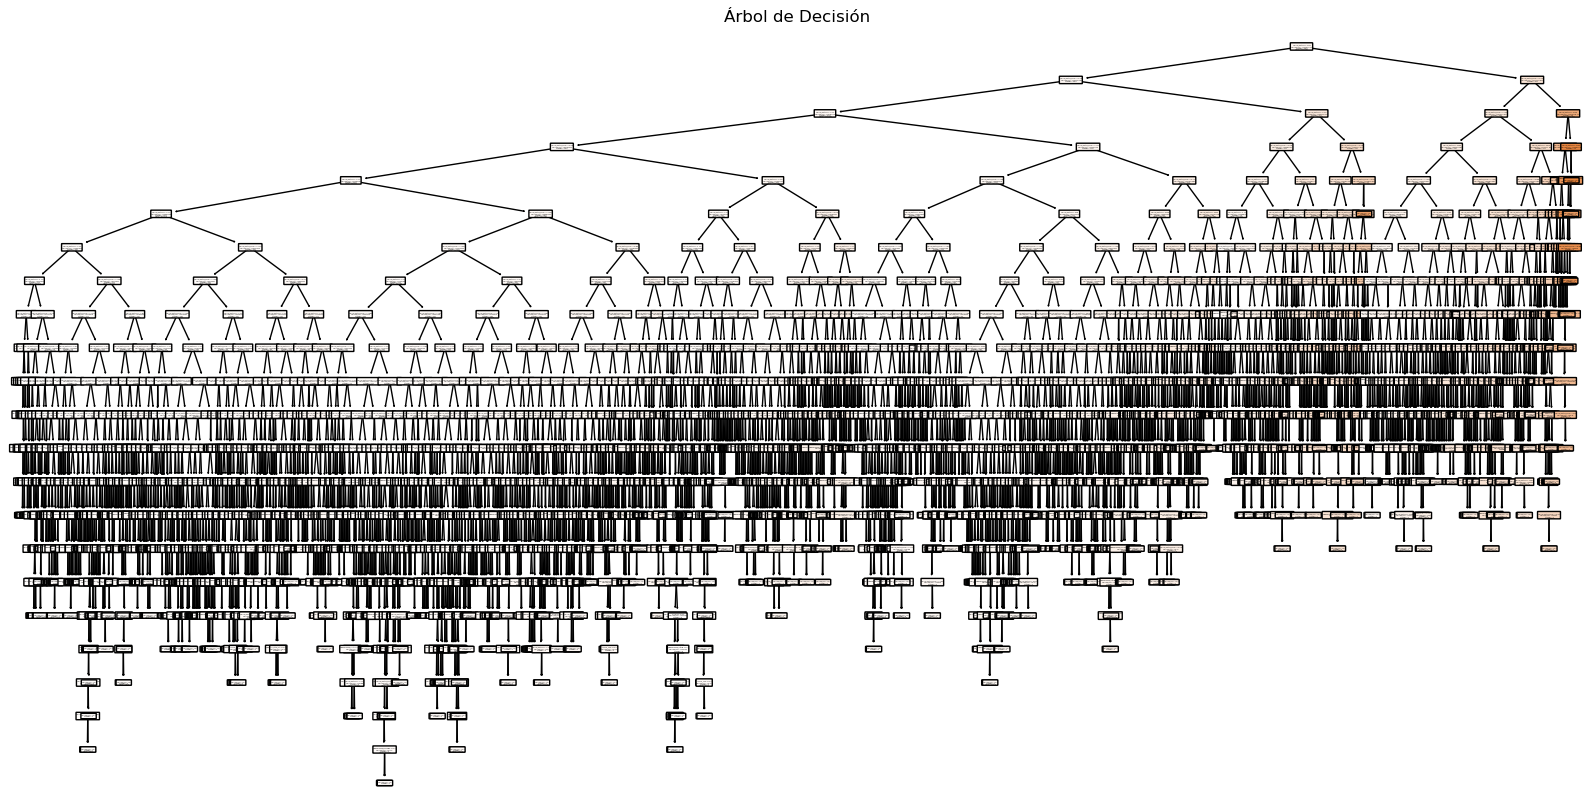

In [117]:
# Graficar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=numeric_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)), rounded=True)
plt.title('Árbol de Decisión')
plt.show()

In [118]:
import joblib

# Guarda el modelo entrenado
joblib.dump(model, "modelo_entrenado.pkl")

['modelo_entrenado.pkl']

In [124]:
import joblib

# Guarda el pipeline completo
joblib.dump(pipeline, "pipeline_random_forest.pkl")

['pipeline_random_forest.pkl']

In [ ]:
# df_clean.to_csv("df_clean.csv", index=False)

### Pruebas con las predicciones y el modelo creado, eso si, no actua en el DF entero, solo con los datos de entreno y prediccion.

In [119]:
# Expandir y_pred para igualar la longitud de df_clean
# df_clean["Predicciones"] = np.concatenate([y_pred, [np.nan] * (len(df_clean) - len(y_pred))])

In [ ]:
# Columna de valores reales en df_clean llamada 'price' y la columna del modelo de predicciones 'Predicciones'
df_clean_comparacion = df_clean[['price', 'Predicciones']]
print(df_clean_comparacion.sample(15))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_clean['price'], bins=30, alpha=0.5, label="Valores Reales")
plt.hist(df_clean['Predicciones'].dropna(), bins=30, alpha=0.5, label="Predicciones")
plt.legend(loc="upper right")
plt.title("Distribución de Valores Reales vs Predicciones")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()